In [2]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [8]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [13]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
data= pd.read_csv("kc_house_data.csv")
data.isnull().sum()
data.drop(['sqft_above'],axis='columns',inplace=True)
conv_dates=[1 if values==2014 else 0 for values in data.date]
data['date']=conv_dates

In [5]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,0,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,0,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,0,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,0,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
y=data[['price']].values
x=data.drop(['id','price'],axis=1).values

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [10]:
#model Training
LiRe=LinearRegression()
LiRe.fit(x_train,y_train)

LinearRegression()

In [11]:
y_predict=LiRe.predict(x_test)
print(y_predict)
print(y_test)

[[406398.50810078]
 [161039.6773569 ]
 [379363.6392734 ]
 ...
 [449218.11899877]
 [385470.50512043]
 [911072.92337732]]
[[595000.]
 [234975.]
 [460000.]
 ...
 [595000.]
 [285000.]
 [680000.]]


In [12]:
print('coefficient of determination:%.3f' % r2_score(y_test,y_predict))

coefficient of determination:0.711


In [13]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



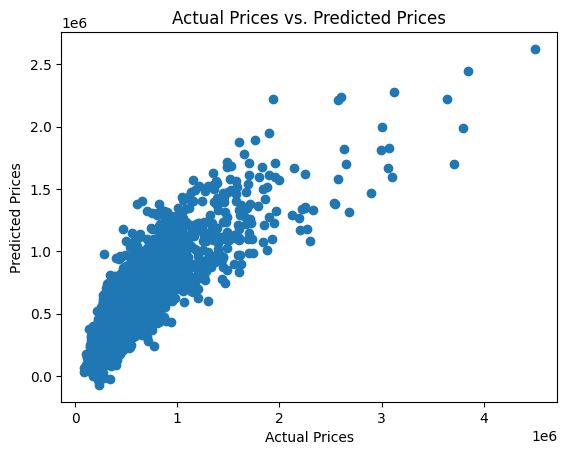

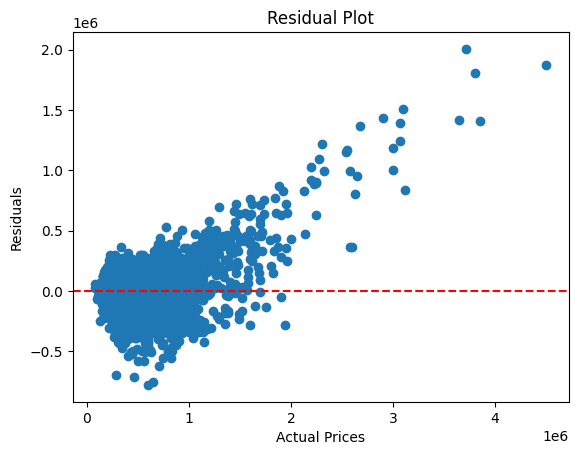

NameError: name 'model' is not defined

In [14]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_predict
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[	7129300520	,0	,267900.0	,3	,7.00,	1880,	5890	,2.0,	0,	0,	8	,9,	0,	2000	,0,	2023,	47.5112,	-122.257,	1340,	5650]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])